In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
Positive = pd.DataFrame()
Same = pd.DataFrame()
Decrease = pd.DataFrame()

In [3]:
def getStock(ticker):
    df = data.DataReader(ticker, 'iex', '2016-01-01', '2018-01-02')
    df.drop(['open', 'high', 'low','volume'], axis=1,inplace=True)
    return df

In [4]:
nike = getStock('NKE')

In [5]:
nike.head(10)

,close
date,
2016-01-04,59.4980
2016-01-05,60.3297
2016-01-06,59.4689
2016-01-07,57.8828
2016-01-08,56.9351
2016-01-11,57.5927
2016-01-12,57.9699
2016-01-13,56.8480
2016-01-14,56.5869


In [6]:
def pct(ticker):
    df = ticker.pct_change()
    return df

In [7]:
nike2 = pct(nike)

In [8]:
nike2.tail(10)

,close
date,
2017-12-18,0.000308
2017-12-19,-0.008795
2017-12-20,-0.010118
2017-12-21,0.018555
2017-12-22,-0.022850
2017-12-26,0.005689
2017-12-27,-0.010999
2017-12-28,0.000000
2017-12-29,-0.006354


In [9]:
nike2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 2016-01-04 to 2018-01-02
Data columns (total 1 columns):
close    503 non-null float64
dtypes: float64(1)
memory usage: 7.9+ KB


In [10]:
nike2[nike2.close < -0.01].count()

close    86
dtype: int64

In [30]:
def stockSort(stockName):
    global Positive, Same, Decrease
    for index, row in stockName.iterrows():
        if stockName.loc[index]['close'].item() > 0.01:
            Positive = Positive.append([stockName.loc[index]],ignore_index=False)
        elif stockName.loc[index]['close'].item() < 0.01 and stockName.loc[index]['close'].item() > -0.01:
            Same = Same.append([stockName.loc[index]],ignore_index=False)
        elif stockName.loc[index]['close'].item() < -0.01:
            Decrease = Decrease.append([stockName.loc[index]],ignore_index=False)
        else:
            print("Start value not used")

In [31]:
goog = getStock('GOOG')

In [32]:
stockSort(nike2)

Start value not used


In [33]:
Positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 2016-01-05 to 2018-01-02
Data columns (total 1 columns):
close    293 non-null float64
dtypes: float64(1)
memory usage: 4.6+ KB


In [34]:
Decrease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 2016-01-06 to 2017-12-27
Data columns (total 1 columns):
close    86 non-null float64
dtypes: float64(1)
memory usage: 1.3+ KB


In [35]:
Same.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, 2016-01-06 to 2017-12-29
Data columns (total 1 columns):
close    1130 non-null float64
dtypes: float64(1)
memory usage: 17.7+ KB


In [17]:
googPCT = pct(goog)

In [18]:
googPCT.head()

,close
date,
2016-01-04,NaN
2016-01-05,0.000998
2016-01-06,0.001401
2016-01-07,-0.023170
2016-01-08,-0.016410


In [19]:
googPCT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 2016-01-04 to 2018-01-02
Data columns (total 1 columns):
close    503 non-null float64
dtypes: float64(1)
memory usage: 7.9+ KB


In [20]:
no = pd.DataFrame()
test = pd.DataFrame()
zero = pd.DataFrame()
for index, row in googPCT.iterrows():
    if googPCT.loc[index]['close'].item() > .01:
        test = test.append([googPCT.loc[index]],ignore_index=False)
    elif googPCT.loc[index]['close'].item() < .01:
        zero = zero.append([googPCT.loc[index]],ignore_index=False)
    elif googPCT.loc[index]['close'].item() > -.01:
        zero = zero.append([googPCT.loc[index]],ignore_index=False)
    else:
        no = no.append([googPCT.loc[index]],ignore_index=False)

In [21]:
test.head()

,close
2016-01-12,0.014022
2016-01-14,0.020212
2016-01-19,0.010570
2016-01-21,0.011654
2016-01-22,0.026409


In [22]:
stockSort(googPCT)

Start value not used


In [23]:
googPCT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 2016-01-04 to 2018-01-02
Data columns (total 1 columns):
close    503 non-null float64
dtypes: float64(1)
memory usage: 27.9+ KB


In [24]:
Positive.head(10)

,close
2016-01-05,0.013979
2016-01-11,0.011550
2016-01-19,0.013203
2016-01-20,0.012347
2016-01-21,0.025745
2016-01-28,0.027191
2016-01-29,0.013234
2016-02-01,0.018547
2016-02-09,0.011629
2016-02-10,0.031070


In [25]:
Same.head(10)

,close
2016-01-06,-0.014268
2016-01-07,-0.026671
2016-01-08,-0.016373
2016-01-12,0.006549
2016-01-13,-0.019353
2016-01-14,-0.004593
2016-01-15,-0.016237
2016-01-22,0.005284
2016-01-25,-0.002957
2016-01-26,0.006754


In [26]:
Decrease.head(10)

""


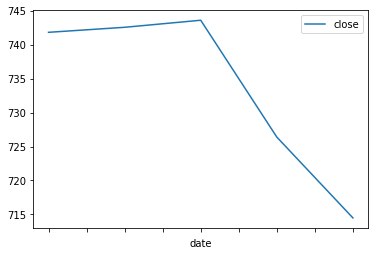

In [27]:
goog.head().plot(stacked=False)

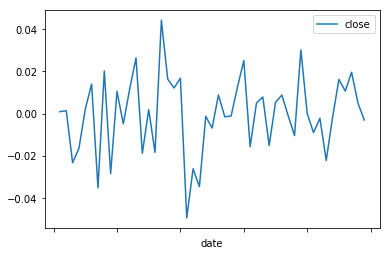

In [28]:
googPCT.head(50).plot.line()

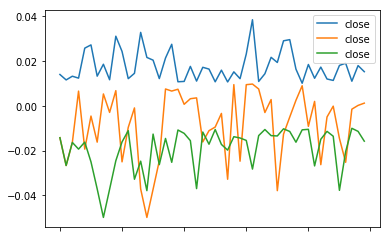

In [36]:
ax = Positive.head(50).plot.line()
Same.head(50).plot.line(ax=ax)
Decrease.head(50).plot.line(ax=ax)